In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig, svd

1. Macierz A:
 [[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]]


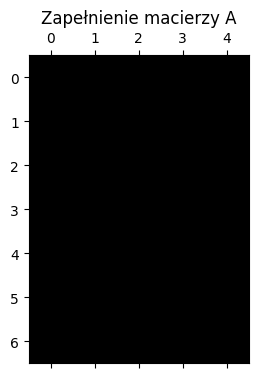

In [13]:
# 1. Wygeneruj macierz A
np.random.seed(0)
n, m = 7, 5 
A = np.random.randn(n, m)

print("1. Macierz A:\n", A)

plt.figure(figsize=(4, 4))
plt.spy(A)
plt.title("Zapełnienie macierzy A")
plt.show()


2. Macierz AAT:
 [[12.73930969 -0.95640957  2.682496    0.09216727 -0.8202151   3.4484367
  -5.53274925]
 [-0.95640957  2.05989432  1.2954197   0.74146195  3.99370055  1.93823046
   0.40383724]
 [ 2.682496    1.2954197   2.92665778  1.7237209   2.15782468  0.55329467
  -0.49880639]
 [ 0.09216727  0.74146195  1.7237209   3.21319166 -2.22359117 -1.15362473
   0.47587015]
 [-0.8202151   3.99370055  2.15782468 -2.22359117 13.39481918  5.77858962
  -0.23543664]
 [ 3.4484367   1.93823046  0.55329467 -1.15362473  5.77858962  6.66073847
  -3.58919833]
 [-5.53274925  0.40383724 -0.49880639  0.47587015 -0.23543664 -3.58919833
   4.99977664]]


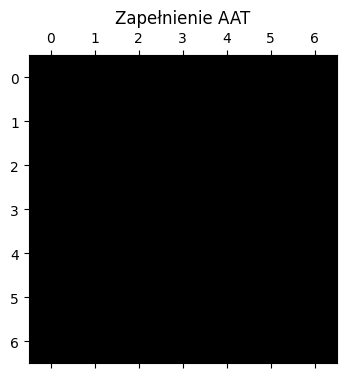

In [14]:
# 2. Oblicz AAT
AAT = A @ A.T
print("\n2. Macierz AAT:\n", AAT)

plt.figure(figsize=(4, 4))
plt.spy(AAT)
plt.title("Zapełnienie AAT")
plt.show()

In [15]:
# 3. Wartości i wektory własne AAT
λ_AAT, U = eig(AAT)
λ_AAT = np.real(λ_AAT)
U = np.real(U)
print("\n3. Wartości własne AAT:\n", λ_AAT)
print("Wektory własne (U):\n", U)


3. Wartości własne AAT:
 [ 1.98616950e+01  1.62810380e+01  5.73679042e+00  3.07811456e+00
  1.03674971e+00  9.88145462e-16 -3.63203142e-17]
Wektory własne (U):
 [[ 0.4595873  -0.69478835 -0.15456151 -0.38852128 -0.28306102  0.16520272
  -0.16945232]
 [ 0.16831418  0.21969377 -0.27941894  0.26553401 -0.21172956 -0.29330851
  -0.77048878]
 [ 0.17858882 -0.04423456 -0.61321728 -0.0773898   0.28744433 -0.60968181
   0.41731329]
 [-0.09626838 -0.09141124 -0.60490951  0.50763175 -0.02592542  0.58490362
   0.06950986]
 [ 0.60438752  0.59482214 -0.0882787  -0.30963759  0.19490001  0.37190777
  -0.00543064]
 [ 0.50899982  0.04107215  0.27333     0.52282926 -0.45802225 -0.18419603
   0.39996198]
 [-0.30809606  0.32123321 -0.2712608  -0.38162528 -0.73755019 -0.02470762
   0.19660079]]


In [16]:
# 4. Macierz U i diagonalna S
sorted_indices = np.argsort(λ_AAT)[::-1]
λ_sorted = λ_AAT[sorted_indices]
U_sorted = U[:, sorted_indices]
S_diag = np.sqrt(np.clip(λ_sorted, 0, None))
S = np.zeros((n, m))
np.fill_diagonal(S, S_diag)

print("\n4. Macierz U:\n", U_sorted)
print("Macierz diagonalna S:\n", S)


4. Macierz U:
 [[ 0.4595873  -0.69478835 -0.15456151 -0.38852128 -0.28306102  0.16520272
  -0.16945232]
 [ 0.16831418  0.21969377 -0.27941894  0.26553401 -0.21172956 -0.29330851
  -0.77048878]
 [ 0.17858882 -0.04423456 -0.61321728 -0.0773898   0.28744433 -0.60968181
   0.41731329]
 [-0.09626838 -0.09141124 -0.60490951  0.50763175 -0.02592542  0.58490362
   0.06950986]
 [ 0.60438752  0.59482214 -0.0882787  -0.30963759  0.19490001  0.37190777
  -0.00543064]
 [ 0.50899982  0.04107215  0.27333     0.52282926 -0.45802225 -0.18419603
   0.39996198]
 [-0.30809606  0.32123321 -0.2712608  -0.38162528 -0.73755019 -0.02470762
   0.19660079]]
Macierz diagonalna S:
 [[4.45664616 0.         0.         0.         0.        ]
 [0.         4.03497683 0.         0.         0.        ]
 [0.         0.         2.39515979 0.         0.        ]
 [0.         0.         0.         1.75445563 0.        ]
 [0.         0.         0.         0.         1.01820907]
 [0.         0.         0.         0.         0

In [18]:
# 5. Oblicz V z definicji: V = AᵗUS⁻¹
r = np.linalg.matrix_rank(A)
U_r = U_sorted[:, :r]
S_r_inv = np.diag(1.0 / S_diag[:r])
V = A.T @ U_r @ S_r_inv
print("\n5. Macierz V:\n", V.T)


5. Macierz V:
 [[-0.37946857  0.17087391  0.28736952  0.4366532   0.74401509]
 [-0.7449244   0.05996162 -0.12561829 -0.65140955  0.03711975]
 [-0.21039754 -0.94802192 -0.1412078   0.18382029  0.05707687]
 [-0.46490283  0.23935052 -0.3478105   0.59196133 -0.5051597 ]
 [-0.20171631 -0.10569995  0.87219666  0.02813293 -0.43199487]]


In [19]:
# 6. Wiersze macierzy V
print("\n6. Wiersze macierzy Vᵗ:\n", V.T)


6. Wiersze macierzy Vᵗ:
 [[-0.37946857  0.17087391  0.28736952  0.4366532   0.74401509]
 [-0.7449244   0.05996162 -0.12561829 -0.65140955  0.03711975]
 [-0.21039754 -0.94802192 -0.1412078   0.18382029  0.05707687]
 [-0.46490283  0.23935052 -0.3478105   0.59196133 -0.5051597 ]
 [-0.20171631 -0.10569995  0.87219666  0.02813293 -0.43199487]]



7. Macierz ATA:
 [[12.85598506 -1.19122348 -0.15659353  3.53451451 -5.31340645]
 [-1.19122348  5.9822955   1.26879969  0.27932105  1.92605582]
 [-0.15659353  1.26879969  3.17255665  3.06729811  4.27461364]
 [ 3.53451451  0.27932105  3.06729811 11.96884834  5.18604702]
 [-5.31340645  1.92605582  4.27461364  5.18604702 12.01470219]]


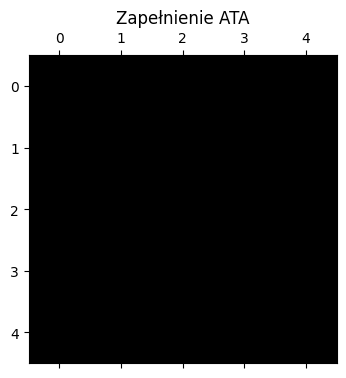

In [20]:
# 7. Macierz ATA
ATA = A.T @ A
print("\n7. Macierz ATA:\n", ATA)

plt.figure(figsize=(4, 4))
plt.spy(ATA)
plt.title("Zapełnienie ATA")
plt.show()

In [21]:
# 8. Wartości i wektory własne ATA
λ_ATA, V2 = eig(ATA)
λ_ATA = np.real(λ_ATA)
V2 = np.real(V2)
print("\n8. Wartości własne ATA:\n", λ_ATA)
print("Wektory własne V:\n", V2.T)


8. Wartości własne ATA:
 [19.86169504 16.28103802  5.73679042  1.03674971  3.07811456]
Wektory własne V:
 [[-0.37946857  0.17087391  0.28736952  0.4366532   0.74401509]
 [ 0.7449244  -0.05996162  0.12561829  0.65140955 -0.03711975]
 [ 0.21039754  0.94802192  0.1412078  -0.18382029 -0.05707687]
 [ 0.20171631  0.10569995 -0.87219666 -0.02813293  0.43199487]
 [ 0.46490283 -0.23935052  0.3478105  -0.59196133  0.5051597 ]]


In [22]:
# 9. Diagonalna S i wiersze V
sorted_indices2 = np.argsort(λ_ATA)[::-1]
λ_sorted2 = λ_ATA[sorted_indices2]
V_sorted = V2[:, sorted_indices2]
S2_diag = np.sqrt(np.clip(λ_sorted2, 0, None))
S2 = np.zeros((n, m))
np.fill_diagonal(S2, S2_diag)

print("\n9. Wiersze macierzy Vᵗ:\n", V_sorted.T)
print("Macierz diagonalna S:\n", S2)


9. Wiersze macierzy Vᵗ:
 [[-0.37946857  0.17087391  0.28736952  0.4366532   0.74401509]
 [ 0.7449244  -0.05996162  0.12561829  0.65140955 -0.03711975]
 [ 0.21039754  0.94802192  0.1412078  -0.18382029 -0.05707687]
 [ 0.46490283 -0.23935052  0.3478105  -0.59196133  0.5051597 ]
 [ 0.20171631  0.10569995 -0.87219666 -0.02813293  0.43199487]]
Macierz diagonalna S:
 [[4.45664616 0.         0.         0.         0.        ]
 [0.         4.03497683 0.         0.         0.        ]
 [0.         0.         2.39515979 0.         0.        ]
 [0.         0.         0.         1.75445563 0.        ]
 [0.         0.         0.         0.         1.01820907]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [23]:
# 10. Oblicz U = AVS⁻¹
S2_inv = np.zeros((m, m))
for i in range(min(n, m)):
    if S2_diag[i] != 0:
        S2_inv[i, i] = 1.0 / S2_diag[i]
U2 = A @ V_sorted @ S2_inv
print("\n10. Macierz U:\n", U2)


10. Macierz U:
 [[ 0.4595873   0.69478835  0.15456151  0.38852128  0.28306102]
 [ 0.16831418 -0.21969377  0.27941894 -0.26553401  0.21172956]
 [ 0.17858882  0.04423456  0.61321728  0.0773898  -0.28744433]
 [-0.09626838  0.09141124  0.60490951 -0.50763175  0.02592542]
 [ 0.60438752 -0.59482214  0.0882787   0.30963759 -0.19490001]
 [ 0.50899982 -0.04107215 -0.27333    -0.52282926  0.45802225]
 [-0.30809606 -0.32123321  0.2712608   0.38162528  0.73755019]]


In [24]:
# 11. Wiersze macierzy U
print("\n11. Kolumny macierzy U:\n", U2)


11. Kolumny macierzy U:
 [[ 0.4595873   0.69478835  0.15456151  0.38852128  0.28306102]
 [ 0.16831418 -0.21969377  0.27941894 -0.26553401  0.21172956]
 [ 0.17858882  0.04423456  0.61321728  0.0773898  -0.28744433]
 [-0.09626838  0.09141124  0.60490951 -0.50763175  0.02592542]
 [ 0.60438752 -0.59482214  0.0882787   0.30963759 -0.19490001]
 [ 0.50899982 -0.04107215 -0.27333    -0.52282926  0.45802225]
 [-0.30809606 -0.32123321  0.2712608   0.38162528  0.73755019]]


In [26]:
# 12. Porównanie dwóch dekompozycji
A_reconstructed_1 = U_sorted @ S @ V.T

r = np.linalg.matrix_rank(A)
U2_r = U2[:, :r]
V_sorted_r = V_sorted[:, :r]
S2_r = np.diag(S_diag[:r])
A_reconstructed_2 = U2_r @ S2_r @ V_sorted_r.T

print("\n12. Różnica A - U S Vᵗ (metoda 1):\n", A - A_reconstructed_1)
print("Różnica A - U S Vᵗ (metoda 2):\n", A - A_reconstructed_2)


12. Różnica A - U S Vᵗ (metoda 1):
 [[-2.22044605e-16  1.66533454e-16  4.44089210e-16  1.33226763e-15
   1.33226763e-15]
 [ 2.22044605e-16  3.33066907e-16 -1.94289029e-16 -6.66133815e-16
   3.33066907e-16]
 [ 1.02695630e-15  0.00000000e+00 -4.44089210e-16  8.46545056e-16
  -1.60982339e-15]
 [ 4.99600361e-16  6.66133815e-16  1.38777878e-16  2.77555756e-16
  -4.44089210e-16]
 [ 0.00000000e+00 -7.77156117e-16 -1.11022302e-16  0.00000000e+00
   4.44089210e-16]
 [ 4.44089210e-16 -1.24900090e-16  1.94289029e-16 -2.22044605e-16
  -4.44089210e-16]
 [-8.32667268e-16 -1.66533454e-16 -2.22044605e-16 -4.44089210e-16
   2.22044605e-16]]
Różnica A - U S Vᵗ (metoda 2):
 [[ 0.00000000e+00  7.21644966e-16 -1.11022302e-15 -2.66453526e-15
  -1.99840144e-15]
 [-4.44089210e-16 -6.66133815e-16 -4.44089210e-16  4.16333634e-17
   1.11022302e-16]
 [ 5.55111512e-17 -1.11022302e-15  1.11022302e-16 -3.05311332e-16
   1.66533454e-16]
 [ 4.44089210e-16 -1.33226763e-15 -4.16333634e-16  5.55111512e-17
   1.33226763e

In [27]:
# 13. Rank i jądro
rank = np.linalg.matrix_rank(A)
nullity = m - rank
print("\n13. Wymiar obrazu R(A):", rank)
print("Wymiar jądra N(A):", nullity)


13. Wymiar obrazu R(A): 5
Wymiar jądra N(A): 0
